In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df

,Unnamed: 0,Gender,Shift,Injury Location,Age_grouping,scaled_DaysLost,scaled_IncidentCost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0,0,1,0,2,0.0,1.0000,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0.0,0.9988,0,0,1,0,0,0,0,0,0
2,2,0,0,0,3,1.0,0.9938,0,0,0,0,0,0,1,0,0
3,3,1,0,1,5,0.5,0.9894,0,0,0,0,0,0,1,0,0
4,4,0,0,0,2,0.6,0.9880,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,509,1,1,0,3,0.0,0.0000,0,0,0,0,0,0,1,0,0
468,510,0,1,0,3,0.0,0.0000,0,0,0,0,0,0,0,1,0
469,511,0,1,0,2,0.0,0.0000,0,1,0,0,0,0,0,0,0
470,512,0,1,4,3,0.0,0.0000,0,0,0,0,0,0,1,0,0


In [2]:
from sklearn.model_selection import train_test_split

X=df[['Gender', 'Shift','scaled_DaysLost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[['Injury Location']].astype(float)
Y=np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =2)
X

,Gender,Shift,scaled_DaysLost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
t_predicted = tree.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,t_predicted))

Accuracy:  0.3157894736842105


In [4]:
t_predicted

array([2., 1., 3., 1., 3., 0., 0., 3., 0., 0., 0., 0., 3., 0., 1., 3., 3.,
       0., 2., 3., 1., 1., 3., 1., 1., 0., 1., 3., 0., 1., 4., 0., 3., 0.,
       3., 0., 1., 0., 0., 3., 1., 0., 3., 4., 3., 1., 3., 1., 1., 0., 3.,
       2., 0., 1., 3., 0., 3., 2., 3., 1., 0., 0., 0., 3., 0., 3., 1., 1.,
       1., 0., 1., 0., 0., 3., 3., 2., 3., 1., 0., 3., 0., 0., 0., 0., 1.,
       3., 3., 3., 1., 0., 0., 4., 3., 1., 0.])

In [5]:
from sklearn.model_selection import GridSearchCV

param={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, 7, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=0), param, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

dt = gs.best_estimator_
print(dt.score(X_test, y_test))

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.3263157894736842


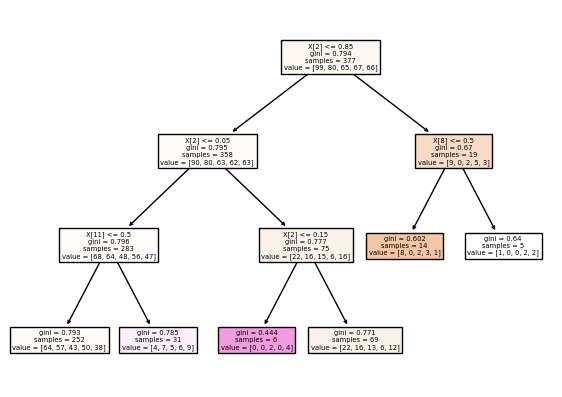

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree

plt.figure(figsize=(7,5), dpi=100)
plot_tree(dt, filled=True)
plt.show()